<a href="https://colab.research.google.com/github/sneha9730/Face-Emotion-Detection/blob/main/notebooks/Mini_xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras import backend as K
from google.colab import files
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import random

In [ ]:
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d msambare/fer2013

!unzip fer2013.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [ ]:
base_model = load_model('/content/fer2013_mini_XCEPTION.99-0.65.hdf5', compile=False)

for layer in base_model.layers[:-7]:
    layer.trainable = True

x = base_model.layers[-2].output
x = Dense(7, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=x)

model.compile(optimizer=Adam(learning_rate=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
selected_classes = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

In [ ]:
data_dir = '/content'

datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [ ]:
train_generator = datagen.flow_from_directory(
    os.path.join(data_dir, 'train'),
    target_size=(64, 64), # Ensure this matches model input
    color_mode='grayscale', # Ensure this matches model input
    batch_size=64,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

Found 22968 images belonging to 7 classes.


In [ ]:
val_generator = datagen.flow_from_directory(
    os.path.join(data_dir, 'train'),
    target_size=(64, 64), # Ensure this matches model input
    color_mode='grayscale', # Ensure this matches model input
    batch_size=64,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 5741 images belonging to 7 classes.


In [ ]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    os.path.join(data_dir, 'test'),
    target_size=(64, 64), # Ensure this matches model input
    color_mode='grayscale', # Ensure this matches model input
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

Found 7178 images belonging to 7 classes.


In [ ]:
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator
)

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/359 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.1860 - loss: 3.2212

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 43s 67ms/step - accuracy: 0.1866 - loss: 3.2155 - val_accuracy: 0.3884 - val_loss: 1.7812
Epoch 2/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.4313 - loss: 1.6713 - val_accuracy: 0.5015 - val_loss: 1.4389
Epoch 3/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.5342 - loss: 1.3494 - val_accuracy: 0.5469 - val_loss: 1.2772
Epoch 4/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.5673 - loss: 1.2288 - val_accuracy: 0.5779 - val_loss: 1.1879
Epoch 5/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.5956 - loss: 1.1339 - val_accuracy: 0.5961 - val_loss: 1.1293
Epoch 6/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.6138 - loss: 1.0813 - val_accuracy: 0.6128 - val_loss: 1.0876
Epoch 7/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.6358 - loss: 1.0204 - val_accuracy: 0.6204 - val_loss: 1.0562
Epoch 8/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.6460 - loss: 0.9795 - val_accurac

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(1, len(train_accuracy) + 1))

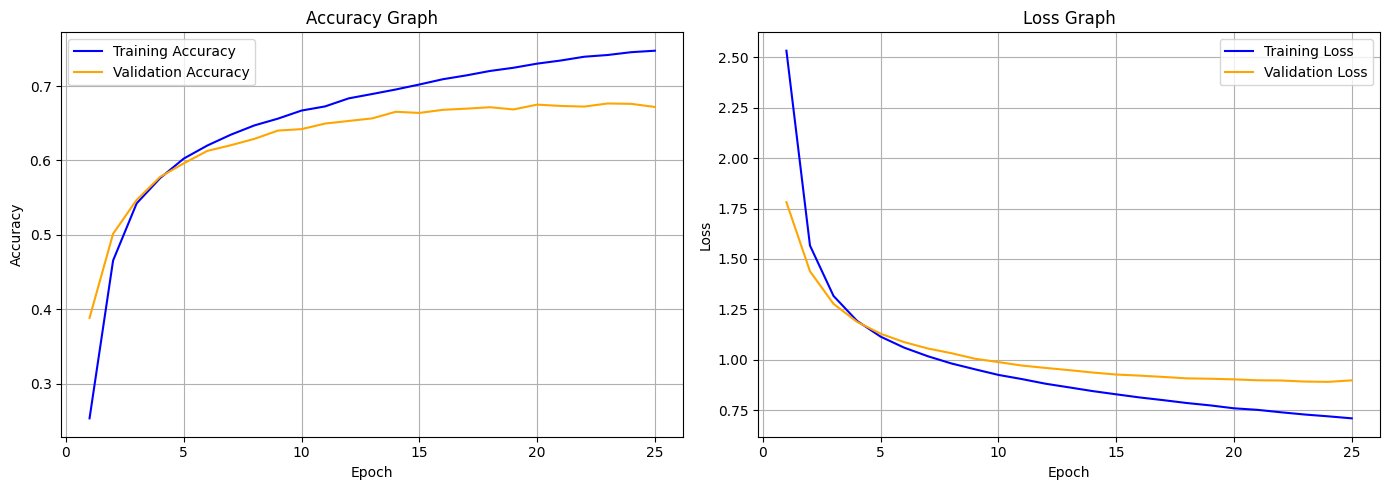

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(epochs, train_accuracy, label='Training Accuracy', color='blue')
ax1.plot(epochs, val_accuracy, label='Validation Accuracy', color='orange')
ax1.set_title('Accuracy Graph')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

ax2.plot(epochs, train_loss, label='Training Loss', color='blue')
ax2.plot(epochs, val_loss, label='Validation Loss', color='orange')
ax2.set_title('Loss Graph')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
final_train_acc = train_accuracy[-1]
final_val_acc = val_accuracy[-1]

print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

Final Training Accuracy: 0.7474
Final Validation Accuracy: 0.6718


In [ ]:
loss, accuracy = model.evaluate(test_generator)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

  1/113 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.5625 - loss: 1.3276

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.5814 - loss: 1.2034

Test Accuracy: 63.15%


In [ ]:
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=selected_classes))

113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step

Classification Report:

              precision    recall  f1-score   support

       angry       0.57      0.59      0.58       958
     disgust       0.60      0.14      0.22       111
        fear       0.46      0.36      0.40      1024
       happy       0.85      0.83      0.84      1774
         sad       0.56      0.61      0.59      1233
    surprise       0.50      0.59      0.54      1247
     neutral       0.77      0.74      0.76       831

    accuracy                           0.63      7178
   macro avg       0.62      0.55      0.56      7178
weighted avg       0.63      0.63      0.63      7178



<Figure size 800x800 with 0 Axes>

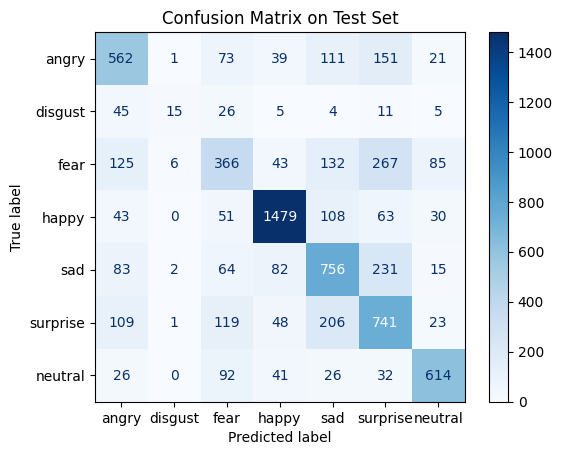

In [ ]:
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=selected_classes)

plt.figure(figsize=(8, 8))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix on Test Set')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


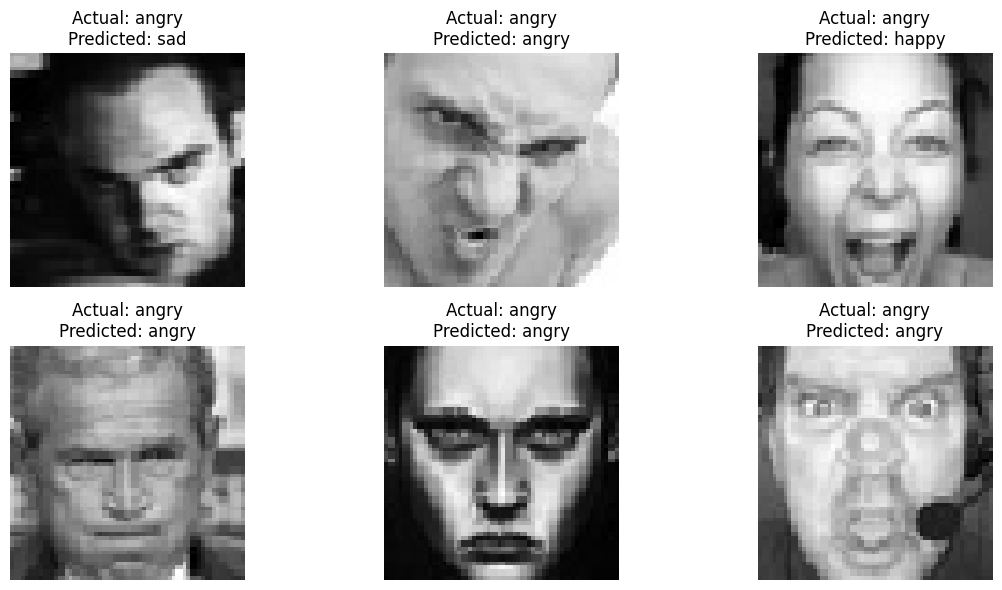

In [ ]:
import random
class_indices = {v: k for k, v in test_generator.class_indices.items()}

images, labels = next(test_generator)
predictions = np.argmax(model.predict(images), axis=1)

indices = list(range(len(images)))
random.shuffle(indices)

plt.figure(figsize=(12, 6))
for i in range(6):
    idx = indices[i]
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[idx].reshape(64, 64), cmap='gray')
    actual = class_indices[np.argmax(labels[idx])]
    predicted = class_indices[predictions[idx]]
    plt.title(f"Actual: {actual}\nPredicted: {predicted}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
model.save("fine_tuned_mini_xception_fer2013.h5")